# Forecasting with Sktime

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [13]:
data = pd.read_feather('../../data/3.3_data_exploded.feather')
data

,ADR,Stay Date
164,0.00,2015-07-01
163,4.00,2015-07-01
135,55.68,2015-07-01
227,62.00,2015-07-01
154,62.50,2015-07-01
...,...,...
409000,153.57,2017-09-11
409699,99.06,2017-09-12
409822,112.80,2017-09-12
409700,99.06,2017-09-13


In [14]:
data = (data.sort_values(by = 'Stay Date')
        .set_index('Stay Date'))
data

,ADR
Stay Date,
2015-07-01,0.00
2015-07-01,101.50
2015-07-01,101.50
2015-07-01,101.50
2015-07-01,101.50
...,...
2017-09-11,153.57
2017-09-12,99.06
2017-09-12,112.80


In [24]:
ts_avg = (data['ADR']
          .resample('D')
          .mean()
          .rolling(window=3)
          .mean()
          .dropna()
          .to_frame())
ts_avg

,ADR
Stay Date,
2015-07-03,90.395286
2015-07-04,89.136111
2015-07-05,89.895981
2015-07-06,90.986900
2015-07-07,91.164970
...,...
2017-09-09,152.044861
2017-09-10,154.971333
2017-09-11,143.550222


In [25]:
y_train, y_test = temporal_train_test_split(ts_avg, test_size=0.2)
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [26]:
forecaster = AutoARIMA()
forecaster.fit(y_train)

c:\Users\Ben\miniforge3\envs\ds-env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ben\miniforge3\envs\ds-env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ben\miniforge3\envs\ds-env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AutoARIMA()

In [27]:
y_pred = forecaster.predict(fh)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

MAPE: 0.27325291385911865


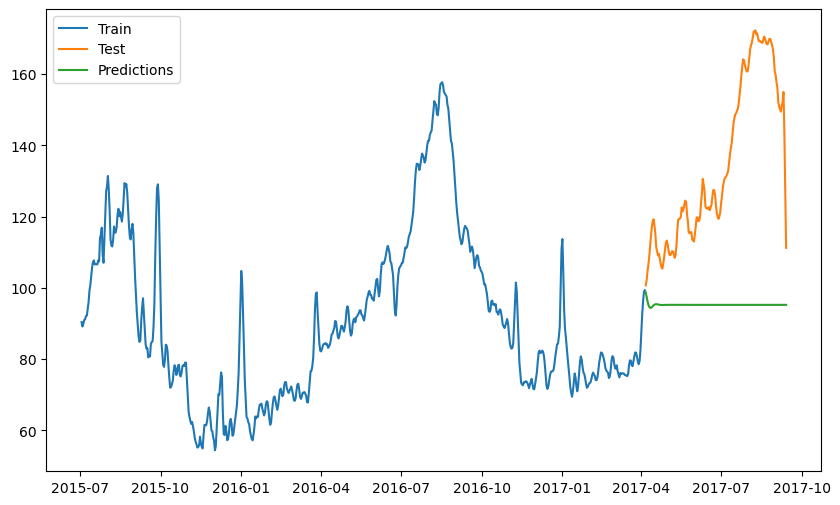

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()

# Ensemble Modeling

In [30]:
from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

# Define individual forecasters
forecasters = [
    ("naive", NaiveForecaster(strategy="mean")),
    ("exp_smoothing", ExponentialSmoothing())
]

# Combine forecasters into an ensemble
ensemble_forecaster = EnsembleForecaster(forecasters=forecasters)

# Fit and predict
ensemble_forecaster.fit(y_train)
y_pred_ensemble = ensemble_forecaster.predict(fh)

# Evaluate
mape_ensemble = mean_absolute_percentage_error(y_test, y_pred_ensemble)
print(f'Ensemble MAPE: {mape_ensemble}')

Ensemble MAPE: 0.27630774383567036


In [31]:
from sktime.forecasting.compose import ReducedForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.base import ForecastingHorizon

# Initialize the regressor
regressor = RandomForestRegressor()

# Initialize the ReducedForecaster with recursive strategy
forecaster = ReducedForecaster(regressor, window_length=10, strategy="recursive")

# Fit the model
forecaster.fit(y_train)

# Make predictions
y_pred = forecaster.predict(fh)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')


ImportError: cannot import name 'ReducedForecaster' from 'sktime.forecasting.compose' (c:\Users\Ben\miniforge3\envs\ds-env\Lib\site-packages\sktime\forecasting\compose\__init__.py)